# 📌 Project Title: Segmenting Instagram Users Using Clustering Techniques

## 🔍 Introduction
In this project, we work with a real-world dataset of Instagram usage and spending behavior: [Instagram Visit Clustering Dataset](https://www.kaggle.com/datasets/chaandsheikh/instagram-visit-clustering).  
We guide you through a complete **Unsupervised Machine Learning** pipeline — from data exploration and preprocessing to applying and comparing various clustering algorithms.

As social media platforms grow, understanding user behavior becomes critical for **targeted marketing**, **content recommendation**, and **engagement strategies**.  
This project aims to group Instagram users into meaningful clusters based on their **visit frequency** and **spending rank**.

## 🎯 Objective
The main objective is to apply and compare the performance of various clustering algorithms to uncover distinct user segments.

The clustering methods explored include:

- **K-Means Clustering**
- **K-Medoids Clustering**
- **Agglomerative Clustering (Single Linkage)**
- **Agglomerative Clustering (Complete Linkage)**

These techniques help identify behavioral groups of Instagram users — such as:

- **High-spenders**
- **Frequent visitors**
- **Occasional users**

—all without the need for labeled data.


## 🔍 Clustering

Clustering is an **unsupervised machine learning** technique used to group similar data points together based on patterns or similarities in their features.

### 🛠️ Types of Clustering Algorithms:

- **K-Means**  
  Assigns data to clusters based on the nearest mean (**centroid**).

- **K-Medoids**  
  Similar to K-Means but uses **real data points** as centers (**medoids**).

- **Hierarchical Clustering**  
  Builds a **tree of clusters** using linkage methods such as:
  - **Single Linkage**
  - **Complete Linkage**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data using Pandas

In [5]:
data = pd.read_csv(r"C:/Users/DELL/Desktop/Course/Machine Learning/Clustering/Instagram visits clustering.csv")
data = data.drop("User ID", axis = 1)
data.head()

,Instagram visit score,Spending_rank(0 to 100)
0,63,24.050708
1,61,25.223290
2,104,18.528245
3,82,86.890232
4,14,31.492397


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Instagram visit score    2600 non-null   int64  
 1   Spending_rank(0 to 100)  2600 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 40.8 KB


In [7]:
data.isnull().sum()

Instagram visit score      0
Spending_rank(0 to 100)    0
dtype: int64

In [8]:
data.describe()

,Instagram visit score,Spending_rank(0 to 100)
count,2600.000000,2600.000000
mean,63.323462,42.848408
std,26.579760,28.758349
min,5.000000,0.940709
25%,38.000000,19.452098
50%,72.000000,28.013082
75%,86.000000,72.116945
max,118.000000,107.349821


## EDA

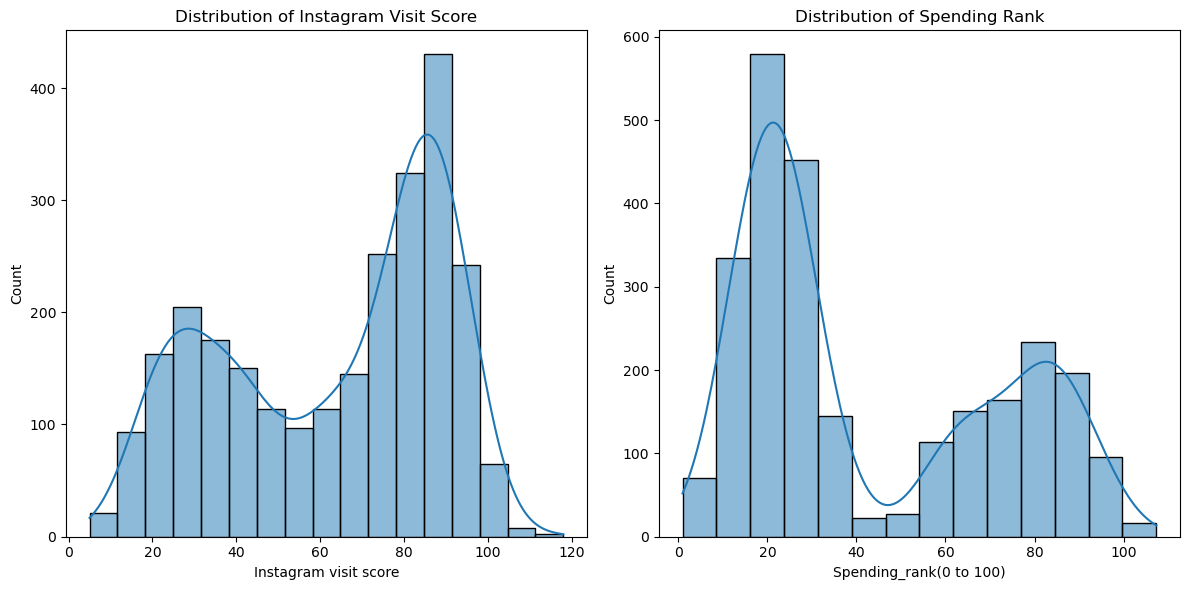

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Instagram visit score'], kde=True)
plt.title('Distribution of Instagram Visit Score')

plt.subplot(1, 2, 2)
sns.histplot(data['Spending_rank(0 to 100)'], kde=True)
plt.title('Distribution of Spending Rank')

plt.tight_layout()
plt.show()

## 📊 Distribution Analysis

### **1. Instagram Visit Score Distribution (Left Plot)**

- The distribution is **bimodal**, showing two peaks:
  - First peak around **30**
  - Second, more prominent peak around **85**
- Suggests **two distinct user groups**:
  - One with low Instagram visit scores (casual users)
  - One with high Instagram visit scores (active users)
- This behavioral split may be useful for audience segmentation.

---

### **2. Spending Rank Distribution (Right Plot)**

- Also **bimodal**, with peaks around:
  - **20** (low spenders)
  - **80** (high spenders)
- Indicates existence of **two major segments** in terms of spending behavior.

---

### **🔍 Overall Inference**

- Both plots show **bimodal distributions**, highlighting **population segmentation**.
- Patterns suggest potential **correlation** between Instagram activity and spending rank.
- Useful for:
  - **Targeted marketing**
  - **User profiling and segmentation**
  - **Behavioral analytics**

> ✅ Next Step: Consider analyzing the **correlation** or **clustering** between Instagram Visit Score and Spending Rank for deeper insights.


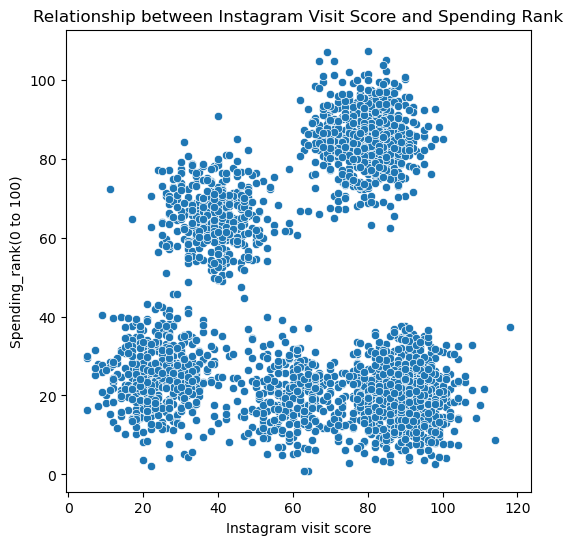

In [12]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Instagram visit score', y='Spending_rank(0 to 100)', data=data)
plt.title('Relationship between Instagram Visit Score and Spending Rank')
plt.show()

## 🔗 Relationship Between Instagram Visit Score and Spending Rank

### **Scatter Plot Insights**

- The scatter plot reveals **five distinct clusters** of users based on their Instagram visit scores and spending ranks.
- These clusters appear as **tight, dense groupings**, indicating strong segmentation in the data.
  
### **Cluster Interpretation**

1. **Low Instagram Score, Low Spending Rank**  
   → Possibly less engaged users with lower digital and purchasing activity.

2. **High Instagram Score, Low Spending Rank**  
   → Highly social/engaged users who do not necessarily spend much.

3. **Low Instagram Score, High Spending Rank**  
   → Users who spend more but are not very active on Instagram (possibly older or non-social users).

4. **Mid Instagram Score, Mid Spending Rank**  
   → Average users with balanced behaviors.

5. **High Instagram Score, High Spending Rank**  
   → **Key target group** – highly engaged on Instagram and high spenders, ideal for marketing.

---

### **📌 Key Takeaways**

- **Strong segmentation**: Users can be grouped into meaningful categories based on behavior.
- **No linear correlation**, but well-defined **behavioral clusters** are evident.
- This data is well-suited for **clustering algorithms** (e.g., K-Means) or **targeted marketing campaigns**.
- Useful for **persona development**, **customer profiling**, and **predictive modeling**.

> ✅ Next Step: Perform **cluster analysis** to formally define and label these groups.


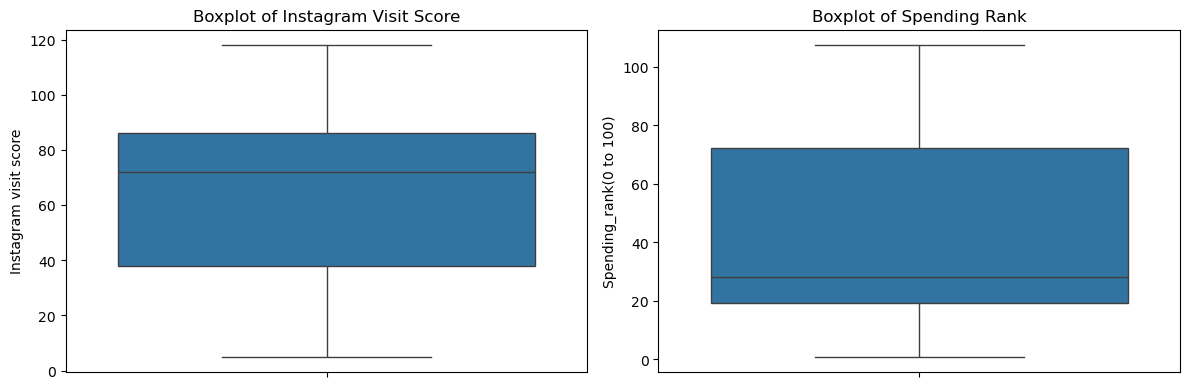

In [14]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(y=data['Instagram visit score'])
plt.title('Boxplot of Instagram Visit Score')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['Spending_rank(0 to 100)'])
plt.title('Boxplot of Spending Rank')
plt.tight_layout()
plt.show()

## 📦 Boxplot Analysis

### **1. Instagram Visit Score**

- **Median (Q2)**: Around **75**, indicating a relatively high central tendency in Instagram activity.
- **Interquartile Range (IQR)**: Broad, from approximately **35 to 95**, suggesting moderate to high variability.
- **Whiskers**: Extend from roughly **5 to 115**, with some potential **outliers beyond this range**.
- Interpretation: A majority of users are **fairly active on Instagram**, but there's a wide spread in user engagement.

---

### **2. Spending Rank**

- **Median (Q2)**: Close to **30**, indicating that half of the users have a relatively low spending rank.
- **IQR**: Spans from around **10 to 75**, reflecting a wider distribution but skewed toward **lower spending**.
- **Whiskers**: Range approximately from **0 to 110**, with possible **outliers on both ends**.
- Interpretation: Most users are **lower to mid-level spenders**, with fewer high spenders.

---

### **📌 Key Takeaways**

- Instagram usage tends to be higher overall compared to spending.
- Spending rank is **more skewed**, with a larger number of users spending less.
- Variability exists in both metrics, suggesting that **segmentation and personalized strategies** could be valuable.


## Scaling Features Using Standard Scaler

In [15]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [19]:
scaled_data

array([[-0.01217181, -0.65376894],
       [-0.08743151, -0.61298749],
       [ 1.53065202, -0.84583579],
       ...,
       [ 1.38013262,  1.46598081],
       [ 0.89094458, -0.77618835],
       [-1.10343744,  1.16650181]])

## Agglomerative Clustering

## 🧬 Agglomerative Clustering

**Agglomerative Clustering** is a type of **hierarchical clustering** that builds clusters **bottom-up** —  
starting with each data point as its own cluster, and then **merging the closest clusters** step by step  
until only one cluster remains (or a stopping condition is met).

### 🔁 How Agglomerative Clustering Works:

1. **Start:**  
   Each data point is its own cluster (**N clusters for N data points**).

2. **Measure distances** between all clusters  
   (based on a chosen **linkage method**, such as:
   - Single Linkage (minimum distance)
   - Complete Linkage (maximum distance)).

3. **Merge** the two closest clusters.

4. **Repeat steps 2–3** until:
   - A **desired number of clusters** is reached, or  
   - All data points are merged into **one big cluster**.


In [28]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [21]:
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
data['Cluster'] = model.fit_predict(scaled_data)

In [22]:
data['Cluster']

0       1
1       1
2       1
3       2
4       0
       ..
2595    0
2596    1
2597    2
2598    1
2599    0
Name: Cluster, Length: 2600, dtype: int64

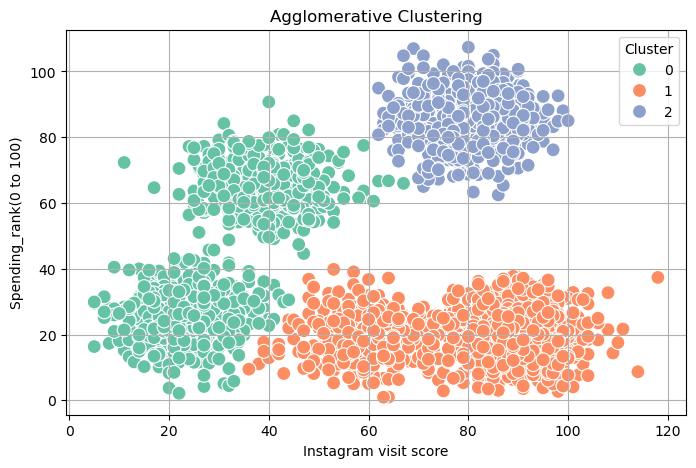

In [23]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x = data['Instagram visit score'],
    y = data['Spending_rank(0 to 100)'],
    hue = data['Cluster'],
    palette = 'Set2',
    s = 100
)
plt.title("Agglomerative Clustering")
plt.grid(True)
plt.show()

## 📌 Cluster Interpretations (Agglomerative Clustering)

### 🟢 Cluster 0 (Green):
- **Low Instagram Visit Score:** 0–50  
- **Low to Medium Spending Rank:** 10–70  
- 💡 Users here are **less active** on Instagram and **spend moderately**.

### 🔴 Cluster 1 (Red/Orange):
- **High Instagram Visit Score:** 50–120  
- **Low Spending Rank:** 0–40  
- 💡 These are **highly active users** with **low spending**.

### 🔵 Cluster 2 (Blue):
- **Medium to High Instagram Visit Score:** 50–120  
- **High Spending Rank:** 60–100  
- 💡 These are your **power users** — **active and big spenders**.


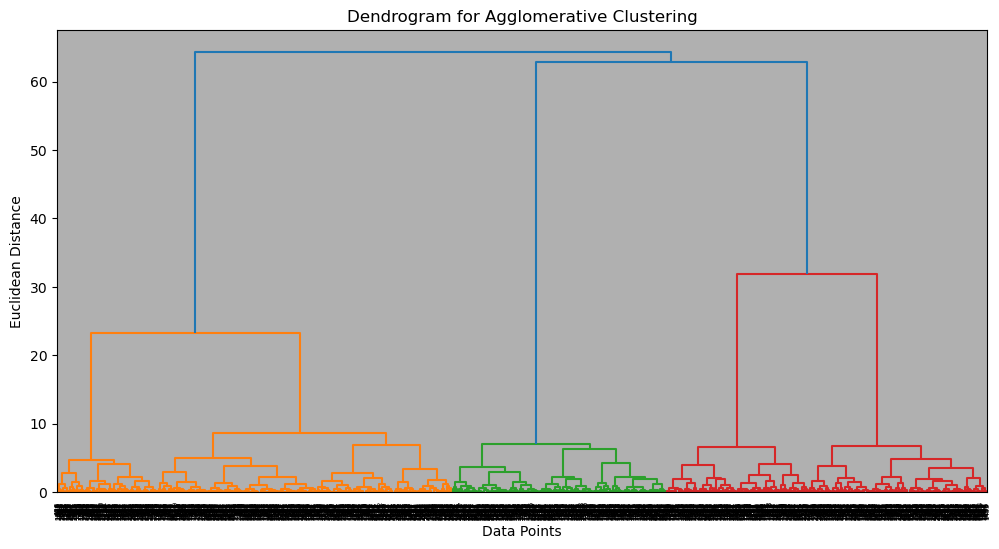

In [24]:
linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked,
          orientation = 'top',
          distance_sort = 'ascending',
          show_leaf_counts=True)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.grid(True)
plt.show()

## 🌳 Dendrogram Visualization

A **dendrogram** helps visualize how data points are hierarchically merged based on their similarity (distance).

### 📊 What This Dendrogram Shows:
- The **x-axis** represents individual data points (or clusters of points).
- The **y-axis** (Euclidean Distance) represents the distance between clusters when they are merged.
- The **vertical lines** indicate where clusters are merged.
- The **height** of these vertical lines shows how dissimilar the merged clusters are —  
  the taller the line, the more different the clusters were.

### 📌 Interpretation:
- The clusters **below that cut** are **compact and similar**, meaning:  
  Users within each cluster are similar in terms of Instagram visit score and spending rank.
- Clusters are **meaningfully separated** — each group has distinct characteristics.
- If you **cut the dendrogram at a lower height**, you'd get more clusters,  
  but they might be too granular or **overfitted**.
 overfitted.

## Agglomerative Hierarchical Clustering using Single Linkage

## 🔗 Agglomerative Hierarchical Clustering using Single Linkage

### 📊 What is Single Linkage?

In **single linkage clustering**, the distance between two clusters is defined as the **shortest distance** between any two points in each cluster.

- It’s **sensitive to outliers**.
- Can lead to a "**chaining effect**," where clusters become elongated or loosely connected.

### 🧠 Algorithm Steps:

1. **Initialize:**  
   Treat each data point as its own cluster → **n clusters**.

2. **Compute Initial Distance Matrix:**  
   Calculate pairwise distances between all data points.

3. **Repeat until the number of clusters = K:**

   a. **Find the closest two clusters:**  
   Use single linkage → the **minimum distance** between any two points in different clusters.

   b. **Merge the two closest clusters** into a single cluster.

   c. **Update the distance matrix:**  
   For the new cluster \( C_{new} \) formed by merging clusters \( A \) and \( B \), calculate distance to another cluster \( X \) as:  
   \[
   D(C_{new}, X) = \min(D(A, X), D(B, X))
   \]

4. **Stop** when only **K clusters** remain.


In [25]:
# Perform Single Linkage CLustering
linked_single = linkage(data, method='single')

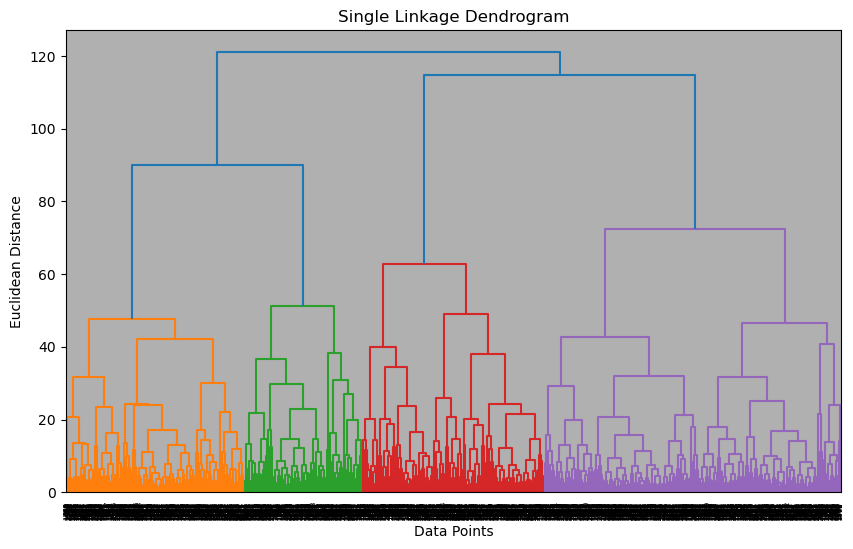

In [57]:
plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title("Single Linkage Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.grid(True)
plt.show()

## 📊 Dendrogram Observation

- The dendrogram shows **3 large branches** before merging at a very high distance (~60).
- Large vertical jumps at the top indicate **natural cluster separation**.
- Cutting the dendrogram around **Euclidean distance ≈ 40–50** results in **3 main clusters**  
  (likely achieved using `t=3` in `fcluster()`).


In [32]:
clusters_single = fcluster(linked_single, t=2, criterion='maxclust')
print("Sinlge Linkage Clusters:", clusters_single)

Sinlge Linkage Clusters: [1 1 1 ... 1 1 1]


## Agglomerative Hierarchical Clustering using Complete Linkage

## 🔗 Agglomerative Hierarchical Clustering using Complete Linkage

### 📊 What is Complete Linkage?

Complete linkage defines the distance between clusters as the **maximum distance** between any two points in different clusters.

- This tends to create **compact, evenly-sized, and well-separated clusters**.

### 🧠 Algorithm Steps:

1. **Initialize:**  
   Treat each data point as its own cluster → **n clusters**.

2. **Compute Initial Distance Matrix:**  
   Calculate pairwise distances between all data points.

3. **Repeat until the number of clusters = K:**

   a. **Find the closest two clusters:**  
   Use complete linkage → the **maximum distance** between any two points in different clusters.

   b. **Merge the two closest clusters** into a single cluster.

   c. **Update the distance matrix:**  
   For the new cluster \( C_{new} \) formed by merging clusters \( A \) and \( B \), calculate distance to another cluster \( X \) as:  
   \[
   D(C_{new}, X) = \max(D(A, X), D(B, X))
   \]

4. **Stop** when only **K clusters** remain.


In [33]:
# Perform Complete Linkage CLustering
linked_complete = linkage(data, method='complete')

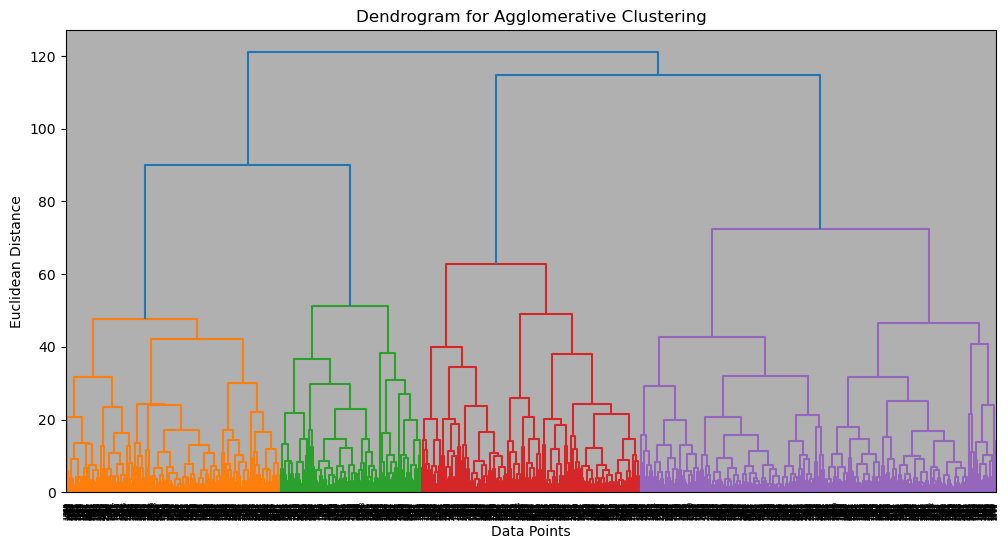

In [34]:
linked = linked_complete
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.grid(True)
plt.show()

In [35]:
clusters_complete = fcluster(linked_complete, t=2, criterion='maxclust')
print("Sinlge Linkage Clusters:", clusters_complete)

Sinlge Linkage Clusters: [2 2 2 ... 1 2 1]


## 📊 Dendrogram Interpretation (Complete Linkage)

- **X-axis:** Represents individual data points (users).
- **Y-axis:** Shows Euclidean distance at which clusters are merged.
- **Color-coded branches:** Indicate final clusters (using `t=2` clusters).
- The tall vertical jump near the top (~120) suggests **two large clusters are well-separated**.


## K-Means Clustering

## 📊 K-Means Clustering

**K-Means clustering** is an **unsupervised machine learning algorithm** used to group similar data points into clusters.  
It’s widely used in **pattern recognition**, **image compression**, **market segmentation**, and more.

### 🧠 How K-Means Clustering Works:

1. **Choose the number of clusters (K):**  
   You decide how many clusters you want to divide the data into.

2. **Initialize centroids:**  
   K points are randomly selected as the initial cluster centers (called **centroids**).

3. **Assign each point to the nearest centroid:**  
   Based on distance (usually **Euclidean**), each data point is assigned to the closest cluster.

4. **Update centroids:**  
   For each cluster, compute the new centroid as the **mean** of all the points assigned to that cluster.

5. **Repeat steps 3–4:**  
   Continue updating clusters and centroids until:
   - Assignments no longer change, or  
   - A maximum number of iterations is reached.


In [36]:
from sklearn.cluster import KMeans

## 📌 Why Elbow Method?

**K-Means** requires you to manually choose **K**, the number of clusters.  
However, choosing too few or too many clusters may lead to **poor or meaningless groupings**.  
The **Elbow Method** helps identify the "sweet spot" where increasing K further does not significantly improve clustering.

### 📉 How It Works:

1. **Run K-Means** for different values of **K** (e.g., K = 1 to 10).
2. **Calculate the Within-Cluster Sum of Squares (WCSS)** for each K.  
   - WCSS measures how close data points are to their assigned cluster centroids.  
   - **Lower WCSS = better clustering**.
3. **Plot** the values of **K vs. WCSS**.
4. **Look for the "elbow" point** on the graph:  
   - It’s where the rate of WCSS reduction sharply slows down.
   - This point indicates the **optimal K**, beyond which additional clusters yield **diminishing returns**.


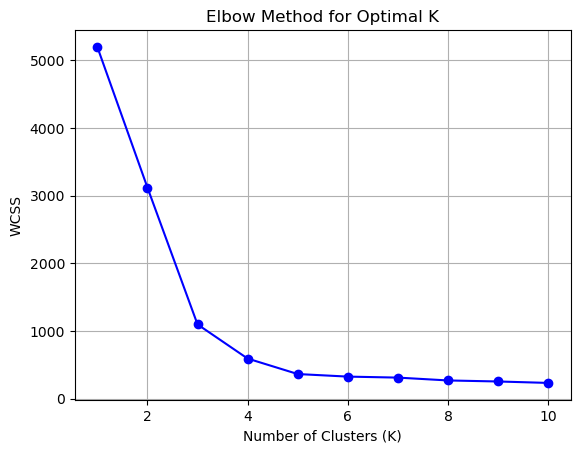

In [54]:
# Use Elbow Method to find optimal K
# This method is to find the optimal value of k
wcss = []
k_range = range(1,11)

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(k_range, wcss, 'bo-')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.grid()
plt.show()

### 📍 Elbow Plot Observation

From the Elbow plot, we observe that the **WCSS significantly decreases** from **K = 1 to K = 3**,  
and the **rate of decrease slows down** from **K = 4 onwards**.

🔎 This suggests that **K = 3** is the **optimal number of clusters**,  
as increasing K beyond this point provides **diminishing returns** in clustering performance.


In [38]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

In [39]:
data['Cluster']

0       0
1       0
2       0
3       2
4       1
       ..
2595    1
2596    0
2597    2
2598    0
2599    1
Name: Cluster, Length: 2600, dtype: int32

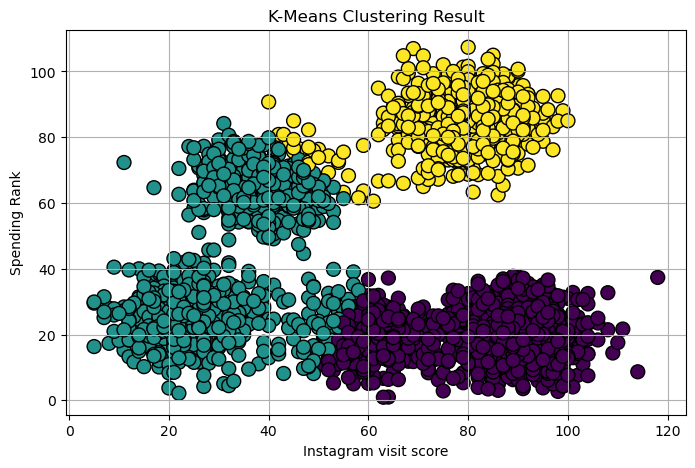

   Instagram visit score  Spending_rank(0 to 100)  Cluster
0                     63                24.050708        0
1                     61                25.223290        0
2                    104                18.528245        0
3                     82                86.890232        2
4                     14                31.492397        1


In [40]:
plt.figure(figsize=(8, 5))
plt.scatter(data['Instagram visit score'], data['Spending_rank(0 to 100)'],
            c=data['Cluster'], cmap='viridis', s=100, edgecolor='k')
plt.title("K-Means Clustering Result")
plt.xlabel("Instagram visit score")
plt.ylabel("Spending Rank")
plt.grid()
plt.show()

print(data.head())

## 📊 Observations from the Plot

### Three Clusters Identified:
The scatter plot is color-coded by the **Cluster** label, indicating that **3 distinct clusters** have been formed using **K-Means**.  
Colors represent each cluster (likely using the **viridis** colormap).

### 📌 Cluster Distribution:

- **Cluster 1 (Top-Right, Yellow):**  
  These users are **very active** on Instagram and also **spend a lot**.  
  ➤ They could be **ideal targets for marketing campaigns**.

- **Cluster 2 (Middle-Left, Greenish-Blue):**  
  These users **spend moderately** but aren’t as active on Instagram.  
  ➤ They may need more engagement to increase Instagram usage.

- **Cluster 3 (Bottom-Right, Dark Blue):**  
  These users are **highly engaged** on Instagram but **don’t spend much**.  
  ➤ Could be **influencers, students, or low-income users**.


## K – Medoid Clustering

## 📌 K-Medoids Clustering

**K-Medoids clustering** is a **partitioning-based** clustering algorithm similar to **K-Means**,  
but with a key difference: Instead of using the **mean (centroid)** to represent a cluster,  
K-Medoids uses an **actual data point** (called a **medoid**) that is the most **centrally located** in the cluster.

### 🛠️ How K-Medoids Works:

1. **Choose the number of clusters (K):**  
   Define how many clusters to form.

2. **Initialize:**  
   Randomly select **K actual data points** as **medoids**.

3. **Assign points:**  
   Assign each data point to the **nearest medoid** based on distance (e.g., Euclidean or Manhattan).

4. **Update medoids:**  
   For each cluster, select the **data point that minimizes the total distance** to all other points in that cluster as the new **medoid**.

5. **Repeat steps 3 and 4** until:
   - Medoids no longer change, or  
   - A predefined **stopping condition** is met.


In [42]:
from sklearn_extra.cluster import KMedoids

In [43]:
kmedoids = KMedoids(n_clusters=3, random_state=0, metric='euclidean')

In [45]:
kmedoids.fit(data)

KMedoids(n_clusters=3, random_state=0)

In [46]:
# Get cluster labels and medoid indices
labels = kmedoids.labels_
medoids = kmedoids.cluster_centers_

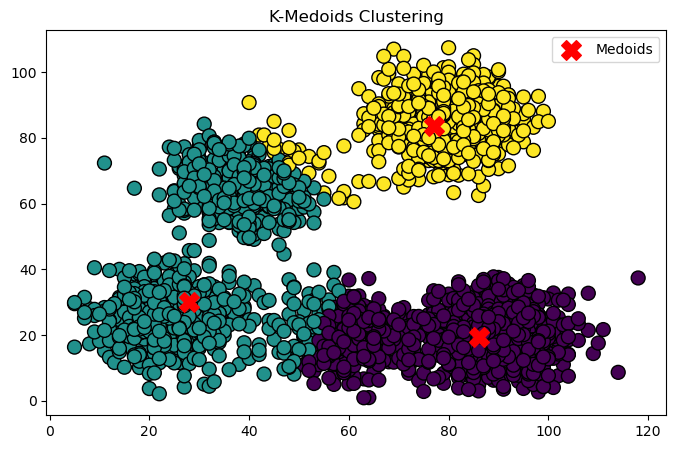

In [53]:
plt.figure(figsize=(8, 5))
plt.scatter(data['Instagram visit score'], data['Spending_rank(0 to 100)'], c=data['Cluster'], cmap='viridis', s=100, edgecolor='k')
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', marker='X', s=200, label='Medoids')
plt.title('K-Medoids Clustering')
plt.legend()
plt.show()

## 📌 Cluster Interpretations (K-Medoids)

### 🟢 Cluster 0 (Green):
- **High Instagram Visit Score:** 60–120  
- **High Spending Rank:** 60–100  
- 💡 These are the **ideal customers** — **active and high spenders**.  
  Likely to be:
  - Influencers  
  - Brand loyalists  
  - Engaged shoppers

### 🟣 Cluster 1 (Purple):
- **Low to Medium Instagram Visit Score:** 0–60  
- **Mixed Spending Rank:** 20–70  
- 💡 These users **spend moderately** but are **not highly engaged** on Instagram.

### 🟡 Cluster 2 (Yellow):
- **High Instagram Visit Score:** 60–120  
- **Low Spending Rank:** 0–40  
- 💡 These users are **very active** on Instagram, but **spend less**.
